## Finite volume method

We will consider conservation law equation (possibly nonlinear) in the form 

$$\begin{equation}
    \rho_t(x, t) + f(\rho(x, t))_x = 0. 
\end{equation}$$


*Steps of derivation of the method will be given here.*


- Consider a space-time cell $[x_{j - 1/2}, x_{j +  1/2}] \times [t_n, t_{n+1}]$ where $x_j = jk, x_{j \pm 1/2} = x_j \pm k/2, t_n = nh.$
- The cell average $\rho_j^n := \frac{1}{k} \int\limits_{x_{j-1/2}}^{x_{j+1/2}} \rho(x, t_n) dx.$
- The numerical flux $F_{j+1/2}^n := \frac{1}{h} \int\limits_{t_n}^{t_{n+1}} f(\rho(x_{j+1/2}, t))dt.$

The scheme for the finite volume method is given by

$$\begin{equation}
    \rho_j^{n+1} = \rho_j^n - \frac{h}{k}\left(F_{j+1/2}^n - F_{j-1/2}^n\right).
\end{equation}$$

### Finite volume method for the LWR model

In the LWR model we assume that the flux is given by

$$\begin{equation}
    f(\rho) = u_{\text{max}} \rho \left(1 - \frac{\rho}{\rho_{\text{max}}}\right).
\end{equation}$$


In order to derive the finite volume method algorithm we need to approximate the numerical flux $F_{j \pm 1/2}^n$. We will use the Lax-Friedrich scheme

$$\begin{equation}
    \rho_j^{n+1} = \frac{1}{2}\left(\rho_{j+1}^n + \rho_{j-1}^n\right) + \frac{h}{2k}\left(f(\rho_{j-1}^n) - f(\rho_{j+1}^n)\right)
\end{equation}$$

with the numerical flux

$$\begin{equation}
    F_{j+1/2}^{n} = \frac{h}{2k}\left(\rho_{j}^n - \rho_{j+1}^n\right) + \frac{1}{2}\left(f(\rho_{j}^n) + f(\rho_{j+1}^n)\right).
\end{equation}$$

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
sns.set_style("darkgrid")
mpl.rcParams['figure.dpi'] = 130

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [53]:
def finite_volume_method(u_max=28, rho_max=0.2, a=0, b=10, T=10, k=0.01, h=0.01):
    """
    Implementation of the finite volume method for the vehicular traffic model.
    
    Arguments:
    u_max - maximum velocity
    rho_max - maximum density
    (a, b) - space range
    (0, T) - time range
    k - spatial step
    h - time step    
    """
    
#     xs = np.arange(a+k/2, b+k/2, k) # vector [x_1, x_2, ..., x_n] where a = x_{1/2}, b = x_{n + 1/2}
    xs = np.arange(a, b+k, k)       # vector [x_0, x_1, x_2, ..., x_n] where a = x_0, b = x_n
    ts = np.arange(0, T+h, h)
    
    rho = np.zeros((len(xs), len(ts)))
    
    # initial condition for t=0
    rho[:int(len(xs)/2),0] = np.ones(int(len(xs)/2))*0.8
    rho[int(len(xs)/2):,0] = np.ones(int(len(xs)/2)+1)
    
    # boundary condition for x=a
    
    
    # boundary condition for x=b
    
    
    for n in range(len(ts)-1):
        rho[1:-1,n+1] = rho[1:-1,n] - h/k*(
        h/(2*k)*(2*rho[1:-1,n] - rho[2:,n] - rho[:-2,n]) 
            + 1/2*u_max*(rho[2:,n]*(1 - rho[2:,n]/rho_max) - rho[:-2,n]*(1 - rho[:-2,n]/rho_max))
        )

    
    return rho, xs, ts

In [51]:
finite_volume_method()

(array([[  0.2,   0. ,   0. , ...,   0. ,   0. ,   0. ],
        [  0.2,   0.2,   0.1, ...,   nan,   nan,   nan],
        [  0.2,   0.2,   0.2, ...,   nan,   nan,   nan],
        ...,
        [  1. ,   1. ,   1. , ...,   nan,   nan,   nan],
        [  1. ,   1. , -55.5, ...,   nan,   nan,   nan],
        [  1. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]]),
 array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ]),
 array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ]))

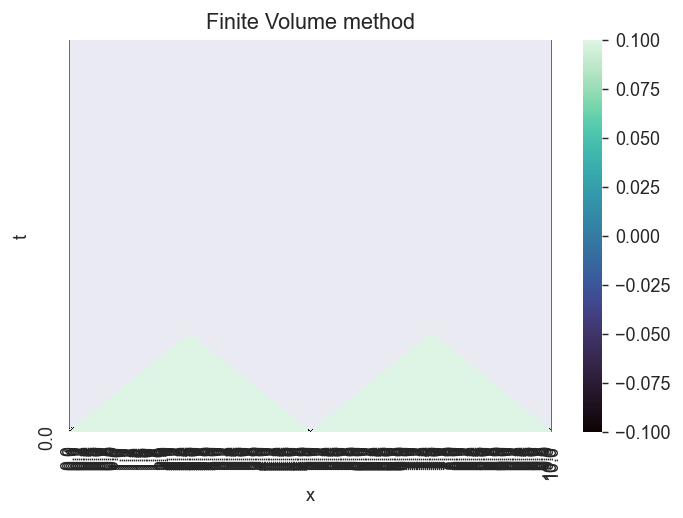

In [52]:
result = finite_volume_method()

xs = result[1]
ts = result[2]

ax = sns.heatmap(pd.DataFrame(result[0].T, columns = np.round(xs,1), index = ts), cmap='mako', xticklabels=4, yticklabels=4000)
ax.invert_yaxis()
plt.title('Finite Volume method')

plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [60]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


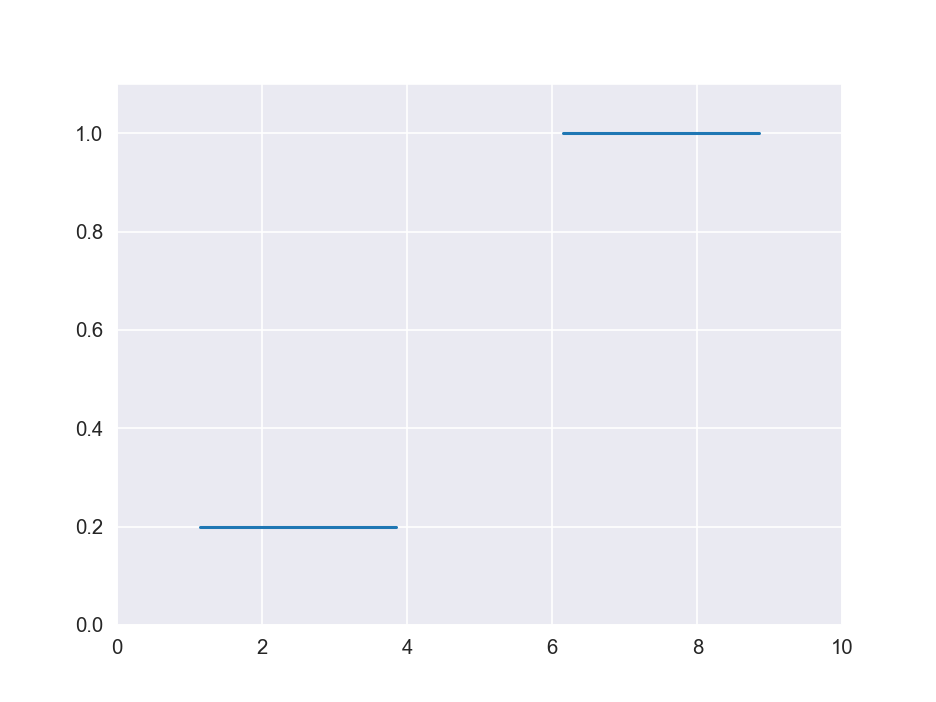

In [66]:
fig, ax = plt.subplots()
line, = ax.plot([])     # A tuple unpacking to unpack the only plot

ax.set_xlim(0, xs[-1])
ax.set_ylim(0, 1+0.1)

def animate(frame_num):
    rhos = result[0][:,frame_num]
    line.set_data((xs, rhos))
    return line

anim = FuncAnimation(fig, animate, frames=len(ts), interval=50)
plt.show()

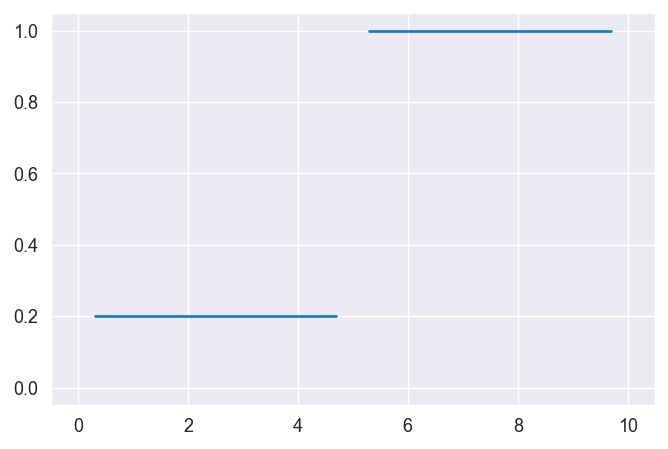

In [58]:
plt.plot(xs, result[0][:])
plt.show()

---------------------------------------
*Approximation of the numerical flux will be given here*
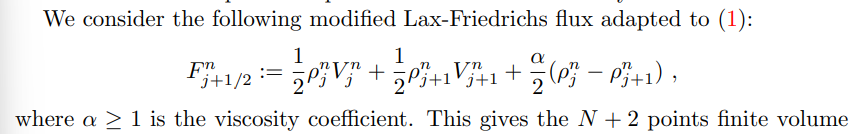

-----------------------------------------------
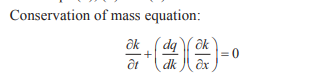
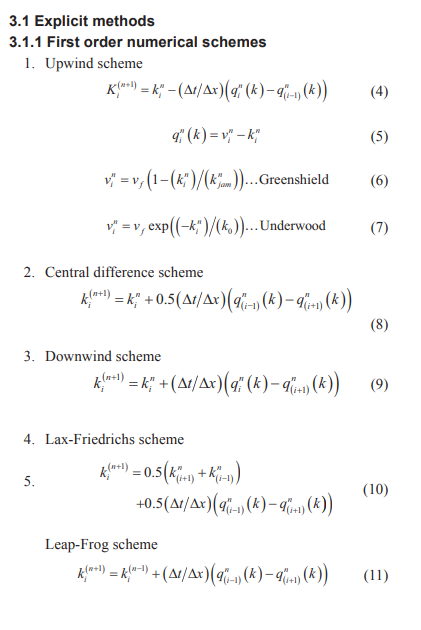

-----------------------

-----------------------------------
*Approximation of the initial datum at $t = 0$ (that is $\rho_j^0$) will be given here*

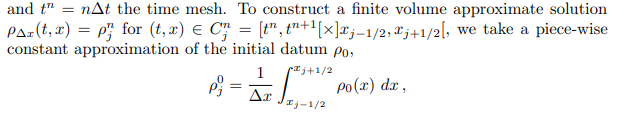

------------------------------